In [76]:
import plotly.graph_objs as go
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/austinlasseter/plotly_dash_tutorial/master/00%20resources/titanic.csv')


In [2]:
df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,0,3,male,22.0,7.2500,Southampton
1,1,1,1,female,38.0,71.2833,Cherbourg
2,2,1,3,female,26.0,7.9250,Southampton
3,3,1,1,female,35.0,53.1000,Southampton
4,4,0,3,male,35.0,8.0500,Southampton


In [3]:
df.columns

Index(['Unnamed: 0', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

In [4]:
df['Female']=df['Sex'].map({'male':0, 'female':1})

In [5]:
df.columns

Index(['Unnamed: 0', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'Female'],
      dtype='object')

In [8]:
df.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,Fare,Embarked,Female,Cabin Class
0,0,0,3,male,22.0,7.2500,Southampton,0,third
1,1,1,1,female,38.0,71.2833,Cherbourg,1,first
2,2,1,3,female,26.0,7.9250,Southampton,1,third
3,3,1,1,female,35.0,53.1000,Southampton,1,first
4,4,0,3,male,35.0,8.0500,Southampton,0,third


In [7]:
df['Cabin Class'] = df['Pclass'].map({1:'first', 2: 'second', 3:'third'})


In [58]:
grouped_mean=df.groupby(['Cabin Class', 'Embarked'])['Survived'].mean()
results1=pd.DataFrame(grouped_mean)
results1

Survived
Cabin Class Embarked             
first       Cherbourg    0.716216
            Queenstown   0.500000
            Southampton  0.611111
second      Cherbourg    0.533333
            Queenstown   0.500000
            Southampton  0.474359
third       Cherbourg    0.439024
            Queenstown   0.250000
            Southampton  0.210345

In [21]:
results.loc['first'].index


Index(['Cherbourg', 'Queenstown', 'Southampton'], dtype='object', name='Embarked')

In [22]:
results.loc['first']['Survived']

Embarked
Cherbourg      0.716216
Queenstown     0.500000
Southampton    0.611111
Name: Survived, dtype: float64

In [51]:
dfDrinks = pd.read_csv('drinks.csv', keep_default_na=False)


In [27]:
dfDrinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [28]:
dfDrinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [85]:
results = dfDrinks.groupby(['continent']).sum().reset_index()
results

,continent,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,AF,3258,866,862,159.4
1,AS,1630,2677,399,95.5
2,EU,8720,5965,6400,387.8
3,NA,3345,3812,564,137.9
4,OC,1435,935,570,54.1
5,SA,2101,1377,749,75.7


In [71]:
results.loc['AF'].index

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [86]:
results.continent

0    AF
1    AS
2    EU
3    NA
4    OC
5    SA
Name: continent, dtype: object

In [92]:
color1='#92A5E8'
color2='#8E44AD'
color3='#FFC300'
mydata1 = go.Bar(
        x=results.continent,
        y=results['beer_servings'],
        name='AF Class',
        marker=dict(color=color1)
    )

mylayout = go.Layout(
    title='Grouped bar chart',
    xaxis = dict(title = 'continent'), # x-axis label
    yaxis = dict(title = 'beer' ), # y-axis label

)
fig = go.Figure(data=[mydata1], layout=mylayout)

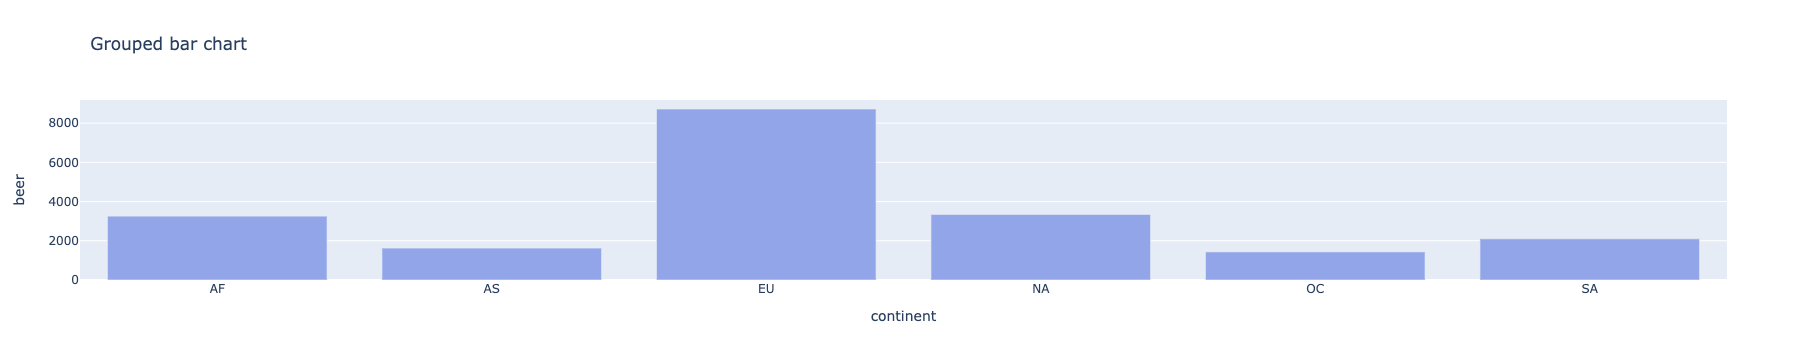

In [93]:
fig